In [1]:
import quandl
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = quandl.get('BSE/SENSEX')
data.head()

,Open,High,Low,Close
Date,,,,
1979-04-03,NaN,NaN,NaN,124.15
1979-04-04,NaN,NaN,NaN,122.85
1979-04-06,NaN,NaN,NaN,123.52
1979-04-07,NaN,NaN,NaN,124.18
1979-04-09,NaN,NaN,NaN,124.30


In [3]:
data = data[['Close']]
data.head()

,Close
Date,
1979-04-03,124.15
1979-04-04,122.85
1979-04-06,123.52
1979-04-07,124.18
1979-04-09,124.30


In [4]:
forecast_out = 30

data['Prediction'] = data[['Close']].shift(-forecast_out)
data.head(6)

,Close,Prediction
Date,,
1979-04-03,124.15,124.41
1979-04-04,122.85,125.27
1979-04-06,123.52,125.99
1979-04-07,124.18,126.58
1979-04-09,124.30,124.58
1979-04-11,125.01,125.26


In [5]:
X = np.array(data.drop(['Prediction'], 1))

In [6]:
X = X[:-forecast_out]

In [7]:
X

array([[  124.15],
       [  122.85],
       [  123.52],
       ...,
       [28535.78],
       [29946.77],
       [29815.59]])

In [8]:
Y = np.array(data['Prediction'])

In [9]:
Y = Y[:-forecast_out]

In [10]:
Y

array([  124.41,   125.27,   125.99, ..., 32008.61, 31122.89, 31097.73])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X = np.array(data.drop(['Prediction'], 1))
X = X[:-forecast_out]

In [13]:
Y = np.array(data['Prediction'])
Y = Y[:-forecast_out]

In [14]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr_confidence = lr.score(X_test, Y_test)
print("LR Confidence Score: ", lr_confidence)

LR Confidence Score:  0.990262620356745


In [16]:
X_forecast = np.array(data.drop(['Prediction'], 1))[-forecast_out:]
lr_prediction = lr.predict(X_forecast)

In [17]:
data1 = pd.DataFrame(data['Close'][-forecast_out:])
data1['LR Prediction'] = lr_prediction

In [18]:
data1.head()

,Close,LR Prediction
Date,,
2020-03-30,28440.32,28562.269654
2020-03-31,29468.49,29591.590054
2020-04-01,28265.31,28387.063839
2020-04-03,27590.95,27711.949310
2020-04-07,30067.21,30190.979951


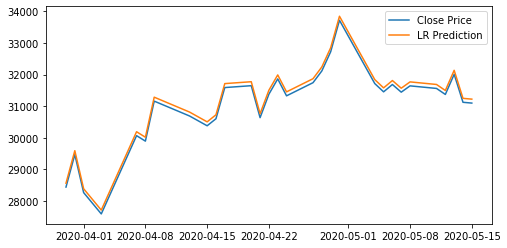

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(data1['Close'], label='Close Price')
plt.plot(data1['LR Prediction'], label='LR Prediction');
plt.legend()

In [21]:
Y_true = data[['Close']][-forecast_out:]

In [22]:
Y_true.head()

,Close
Date,
2020-03-30,28440.32
2020-03-31,29468.49
2020-04-01,28265.31
2020-04-03,27590.95
2020-04-07,30067.21


In [23]:
Y_pred = lr_prediction
Y_pred

array([28562.26965407, 29591.59005407, 28387.06383869, 27711.94931002,
       30190.97995058, 30017.53610442, 31284.6122275 , 30814.48680093,
       30503.92971281, 30726.97899953, 31714.19233939, 31773.53866666,
       30761.11715337, 31504.78830302, 31988.85931561, 31452.39975197,
       31868.72504988, 32240.58064708, 32846.89828624, 33845.4743254 ,
       31840.9640233 , 31578.83105547, 31811.33090442, 31568.68972121,
       31768.23273659, 31686.66157016, 31496.34887086, 32134.55214638,
       31247.841131  , 31222.65297995])

In [24]:
mean_squared_error(Y_true, Y_pred, squared=False)

124.83655643973636

### Using SVR Method

In [25]:
from sklearn.svm import SVR

In [26]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, Y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
svm_confidence = svr_rbf.score(X_test, Y_test)
print("SVM Confidence Score: ", svm_confidence)

SVM Confidence Score:  0.19657517326706786


In [28]:
svr_prediction = svr_rbf.predict(X_forecast)

In [29]:
data2  = pd.DataFrame(data['Close'][-forecast_out:])
data2['SVR Prediction'] = svr_prediction

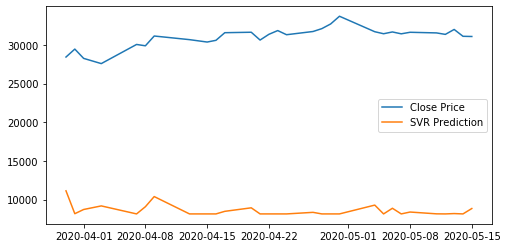

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(data2['Close'], label='Close Price')
plt.plot(data2['SVR Prediction'], label='SVR Prediction');
plt.legend();

In [31]:
Y_pred2 = np.round(svr_prediction, decimals=2)
Y_pred2

array([11129.99,  8170.45,  8715.05,  9178.47,  8142.36,  9074.24,
       10386.41,  8142.36,  8142.36,  8142.36,  8476.7 ,  8931.23,
        8142.36,  8142.78,  8142.36,  8142.36,  8345.15,  8142.36,
        8142.36,  8142.36,  9283.41,  8142.36,  8873.4 ,  8142.36,
        8385.59,  8152.31,  8142.38,  8186.8 ,  8142.36,  8840.86])

In [32]:
mean_squared_error(Y_true, Y_pred2, squared=False)

22534.07442438347

### Using K Nearest Neighbours

In [33]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [34]:
knn_confidence = knn.score(X_test, Y_test)
print("KNN Confidence Score is:", knn_confidence)

KNN Confidence Score is: 0.9922371735049733


In [35]:
knn_prediction = knn.predict(X_forecast)

In [36]:
data3  = pd.DataFrame(data['Close'][-forecast_out:])
data3['KNN Prediction'] = knn_prediction

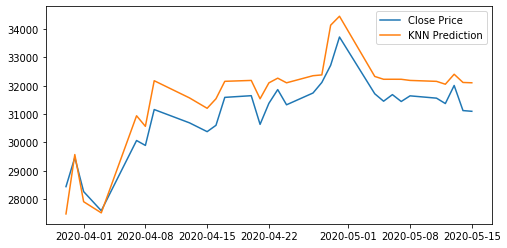

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(data3['Close'], label='Close Price')
plt.plot(data3['KNN Prediction'], Label='KNN Prediction');
plt.legend();

In [39]:
Y_pred3 = np.round(knn_prediction, decimals=2)
Y_pred3

array([27478.09, 29571.9 , 27908.81, 27515.56, 30939.92, 30567.2 ,
       32175.86, 31569.72, 31203.45, 31539.28, 32154.94, 32186.5 ,
       31539.28, 32100.48, 32266.55, 32102.48, 32352.88, 32380.97,
       34134.45, 34450.35, 32326.93, 32226.98, 32227.88, 32226.98,
       32186.5 , 32153.7 , 32052.51, 32404.48, 32114.55, 32103.36])

In [40]:
mean_squared_error(Y_true, Y_pred2, squared=False)

22534.07442438347